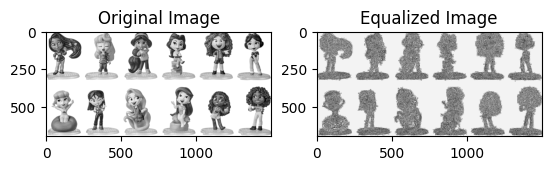

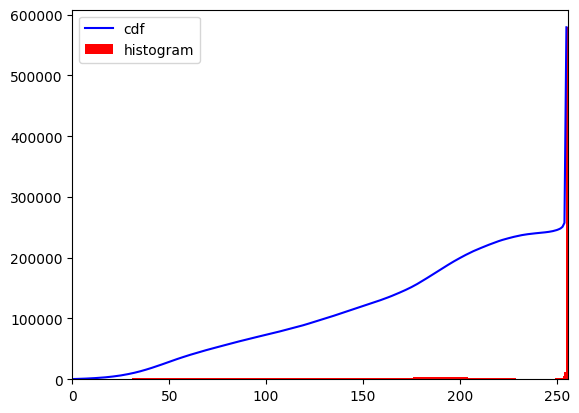

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path):
    # Read the image
    img = cv2.imread(image_path, 0)  # 0 indicates grayscale

    # Calculate the histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Perform histogram equalization
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)

    # Reshape the image back to its original shape
    img_equalized = img_equalized.reshape(img.shape)

    # Convert to uint8 (8-bit) format
    img_equalized = np.uint8(img_equalized)

    # Display the original and equalized images
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(img_equalized, cmap='gray'), plt.title('Equalized Image')
    plt.show()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')

# Example usage
image_path = '/content/drive/MyDrive/coba.jpg'
histogram_equalization(image_path)